<a href="https://colab.research.google.com/github/geopr2030/eurosat/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies and Data
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


In [ ]:
#Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
#bringing in tensorflow dataset for satellite images
import tensorflow_datasets as tfds
#Bringing in matplotlib for visualisation stuff
from matplotlib import pyplot as plt

In [ ]:
#Use the tensorflow dataset api to bring in the data source
ds = tfds.load('eurosat',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/2.0.0.incompleteU3D2D6/eurosat-train.tfrecord*...:   0%|      …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


array([[[35, 59, 71],
        [35, 59, 71],
        [36, 60, 72],
        ...,
        [32, 60, 72],
        [31, 59, 70],
        [33, 63, 73]],

       [[35, 59, 71],
        [34, 61, 72],
        [37, 61, 73],
        ...,
        [31, 59, 70],
        [31, 59, 70],
        [33, 63, 73]],

       [[37, 64, 73],
        [35, 64, 72],
        [38, 65, 74],
        ...,
        [35, 63, 74],
        [31, 59, 70],
        [32, 61, 69]],

       ...,

       [[31, 54, 70],
        [29, 55, 68],
        [32, 59, 70],
        ...,
        [33, 62, 70],
        [32, 60, 71],
        [34, 62, 73]],

       [[33, 59, 72],
        [32, 59, 70],
        [32, 59, 70],
        ...,
        [32, 60, 71],
        [37, 66, 74],
        [35, 65, 73]],

       [[34, 62, 73],
        [33, 61, 72],
        [35, 62, 73],
        ...,
        [36, 64, 75],
        [35, 65, 73],
        [30, 60, 68]]], dtype=uint8)
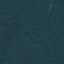

In [ ]:
ds.as_numpy_iterator().next()['image']

Visualize data and build dataset

In [ ]:
#Do some data transformation
import numpy as np

In [ ]:
#Setup connection that is iterator
dataiterator = ds.as_numpy_iterator()

In [ ]:
#Getting data out of the data pipeline
dataiterator.next()

{'filename': b'Forest_687.jpg',
 'image': array([[[35, 59, 71],
         [35, 59, 71],
         [36, 60, 72],
         ...,
         [32, 60, 72],
         [31, 59, 70],
         [33, 63, 73]],
 
        [[35, 59, 71],
         [34, 61, 72],
         [37, 61, 73],
         ...,
         [31, 59, 70],
         [31, 59, 70],
         [33, 63, 73]],
 
        [[37, 64, 73],
         [35, 64, 72],
         [38, 65, 74],
         ...,
         [35, 63, 74],
         [31, 59, 70],
         [32, 61, 69]],
 
        ...,
 
        [[31, 54, 70],
         [29, 55, 68],
         [32, 59, 70],
         ...,
         [33, 62, 70],
         [32, 60, 71],
         [34, 62, 73]],
 
        [[33, 59, 72],
         [32, 59, 70],
         [32, 59, 70],
         ...,
         [32, 60, 71],
         [37, 66, 74],
         [35, 65, 73]],
 
        [[34, 62, 73],
         [33, 61, 72],
         [35, 62, 73],
         ...,
         [36, 64, 75],
         [35, 65, 73],
         [30, 60, 68]]], dtype=uint8),
 

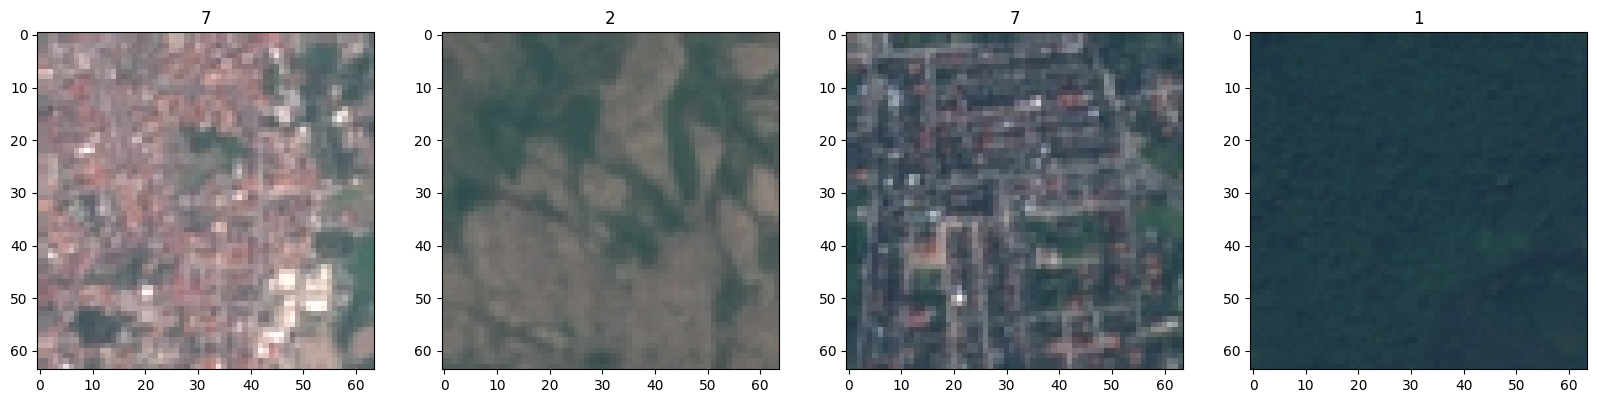

In [ ]:
#Setup the subplot formatting
fig,ax=plt.subplots(ncols=4,figsize=(20,20))  #ax is individual images
#Loop four times and get images
for idx in range(4):
  #Grab an image and label
  sample=dataiterator.next()
  #Plot the image using a specific subplot
  ax[idx].imshow(np.squeeze(sample['image'])) #squeezing image to have in proper format
  ax[idx].title.set_text(sample['label']) #Gives number at the top of every images

In [ ]:
#Scale(between 0 and 1 for better and faster training) and return images only
def scale_images(data):
  image=data['image']
  return image/255

In [ ]:
#Running the dataset through the scale_images preprocessing setup
ds=ds.map(scale_images)
#Cache the dataset for that batch
ds=ds.cache()
#Shuffle the dataset
ds=ds.shuffle(27000)
#Batch into 128 images per sample
ds=ds.batch(128)
#Reduces the likelihood of bottlenecking
ds=ds.prefetch(64)

In [ ]:
#Get a 128 batch of image sample
ds.as_numpy_iterator().next()

array([[[[0.14509805, 0.24705882, 0.30588236],
         [0.14117648, 0.24313726, 0.3019608 ],
         [0.13333334, 0.23529412, 0.3019608 ],
         ...,
         [0.15294118, 0.2627451 , 0.30980393],
         [0.15294118, 0.25490198, 0.32156864],
         [0.15686275, 0.25882354, 0.3254902 ]],

        [[0.14117648, 0.24313726, 0.3019608 ],
         [0.14117648, 0.24313726, 0.3019608 ],
         [0.14117648, 0.24313726, 0.30980393],
         ...,
         [0.15294118, 0.25490198, 0.3137255 ],
         [0.15294118, 0.25490198, 0.32156864],
         [0.15686275, 0.25882354, 0.3254902 ]],

        [[0.14509805, 0.25490198, 0.30980393],
         [0.14901961, 0.25882354, 0.3137255 ],
         [0.13725491, 0.24313726, 0.30980393],
         ...,
         [0.15294118, 0.24313726, 0.30588236],
         [0.15294118, 0.24313726, 0.3137255 ],
         [0.16078432, 0.2509804 , 0.32156864]],

        ...,

        [[0.17254902, 0.2627451 , 0.3254902 ],
         [0.17254902, 0.2627451 , 0.3254902 ]

Build Neural Network

In [ ]:
#Bring in the sequential api for the generator and discriminator
#Generator-> generates the images
#Discriminator->verfies wether the image is real or fake
from tensorflow.keras.models import Sequential
#bring in the layers for neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

Build Generator

In [ ]:
def build_generator():
  model=Sequential()
  #Takes in random values and reshapes it to 7*7*128
  #Beginings of a generated image
  model.add(Dense(7*7*128,input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  #Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  #Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #Convolutional block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  #Conv layer to get one channel (reduces no of  channel)
  #sigmoid is used to get the values between 0 and 1
  model.add(Conv2D(1,4,padding='same', activation='sigmoid'))

  return model

In [ ]:
generator=build_generator()

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
#Generates 4 different random images and 128 random values
img=generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 408ms/step


array([[[[0.49934188],
         [0.49905095],
         [0.49733898],
         ...,
         [0.5137989 ],
         [0.51386005],
         [0.5036365 ]],

        [[0.49758905],
         [0.49884957],
         [0.50026184],
         ...,
         [0.5158035 ],
         [0.5124283 ],
         [0.50011015]],

        [[0.50484294],
         [0.51077557],
         [0.5066858 ],
         ...,
         [0.5085127 ],
         [0.5074914 ],
         [0.50119597]],

        ...,

        [[0.4992783 ],
         [0.5031866 ],
         [0.5039608 ],
         ...,
         [0.50087684],
         [0.5003604 ],
         [0.5009646 ]],

        [[0.49453637],
         [0.50348794],
         [0.506379  ],
         ...,
         [0.49820352],
         [0.49699   ],
         [0.500223  ]],

        [[0.50072557],
         [0.50455457],
         [0.5054775 ],
         ...,
         [0.49963048],
         [0.49992356],
         [0.5000406 ]]],


       [[[0.49491605],
         [0.4937569 ],
         [0.49

In [ ]:
img.shape

(4, 28, 28, 1)

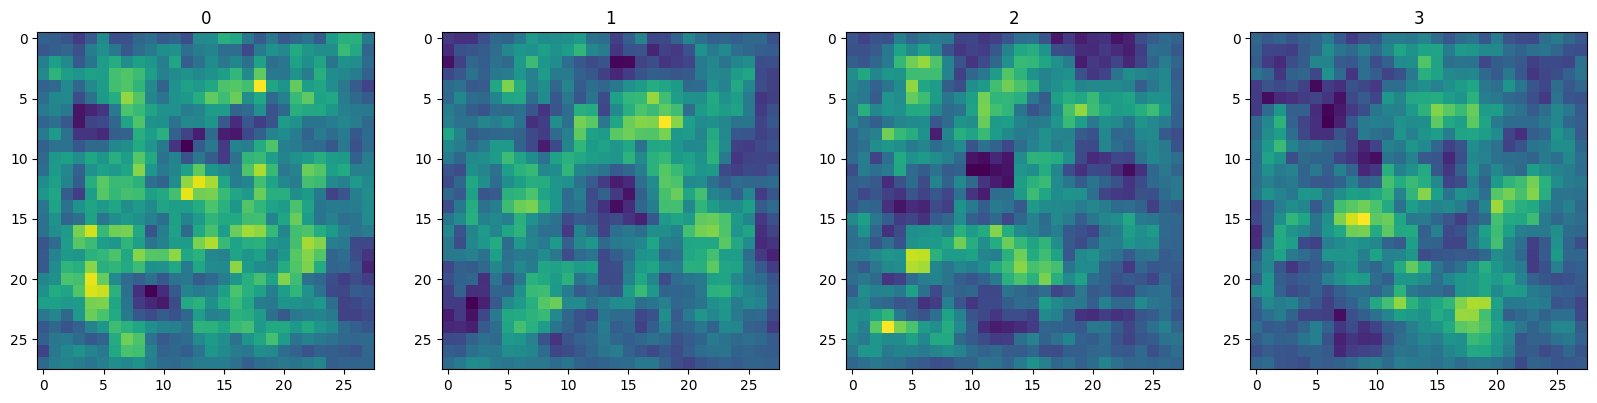

In [ ]:
#Generate new images
#img=generator.predict(np.random.randn(4,128,1))
#Get images generated by the generator
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
#Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    #Append the image label as per the plot title
    ax[idx].title.set_text(idx)

Build Discriminator

In [ ]:
def build_discriminator():
  model=Sequential()

  #First Convolutional Block
  #Conv Layers is passing through 32 filters having shape 5*5
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Second Convolutional Block
  #Conv Layers is passing through 64 filters having shape 5*5 and since it is second layers so no input shape is defined
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Third Convolutional Block
  #Conv Layers is passing through 128 filters having shape 5*5
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Fourth Convolutional Block
  #Conv Layers is passing through 256 filters having shape 5*5
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [ ]:
discriminator=build_discriminator()

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
img=img[0]

In [ ]:
img=generator.predict(np.random.randn(4,128,1))
discriminator.predict(img)

1/1 [==============================] - 0s 46ms/step


array([[0.5014971 ],
       [0.5015831 ],
       [0.50163543],
       [0.5016521 ]], dtype=float32)

Construct the training loop to train the generator and discriminator simultaneously

In [ ]:
#Setup losses and optimizers
#Adam is going to be optimizers for both (generator and discriminator)
from tensorflow.keras.optimizers import Adam
#Binary cross entropy is going to be loss for both (generator and discriminator)
from tensorflow.keras.losses import BinaryCrossentropy


In [ ]:
#Optimizer for generator
g_opt = Adam(learning_rate=0.0001)
#Optimizer for discriminator
d_opt = Adam(learning_rate=0.00001)
#Loss for generator
g_loss = BinaryCrossentropy()
#Loss for discriminator
d_loss = BinaryCrossentropy()

In [ ]:
#Import the base model class to subclass of training step
from tensorflow.keras.models import Model

In [ ]:
tf.random.normal((6,128,1))

<tf.Tensor: shape=(6, 128, 1), dtype=float32, numpy=
array([[[ 0.14218189],
        [-0.7737658 ],
        [ 0.48157537],
        [ 0.6703666 ],
        [-1.4597923 ],
        [-0.68627524],
        [-0.7979352 ],
        [-0.62140316],
        [ 0.441546  ],
        [ 0.10716575],
        [ 1.3433615 ],
        [ 0.5071839 ],
        [ 0.3265105 ],
        [-0.24047695],
        [ 1.0169067 ],
        [-0.56932175],
        [-0.7402737 ],
        [-0.90193516],
        [-2.548622  ],
        [-1.8603628 ],
        [-0.00825514],
        [-0.37112677],
        [-0.85646504],
        [-0.09779891],
        [ 1.8729705 ],
        [ 1.5616504 ],
        [-1.2236409 ],
        [-0.5296596 ],
        [-0.45175228],
        [ 0.70486885],
        [ 0.6524168 ],
        [ 0.3499734 ],
        [-0.96428937],
        [ 0.20818165],
        [ 0.8819126 ],
        [-0.47150332],
        [-1.7808168 ],
        [ 1.7562152 ],
        [ 1.0716357 ],
        [-0.5239003 ],
        [ 0.70486975],
    

In [ ]:
tf.concat([tf.zeros_like(tf.random.normal((6,128))),tf.ones_like(tf.random.normal((6,128)))], axis=0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [ ]:
class SatelliteGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    #Pass through args and kwargs to base class
    super().__init__(*args, **kwargs)

    #Create attributes of generator and discriminator
    self.generator=generator
    self.discriminator=discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    #Compile with base class
    super().compile(*args, **kwargs)

    #Create attributes for losses and optimizers
    self.g_opt=g_opt
    self.d_opt=d_opt
    self.g_loss=g_loss
    self.d_loss=d_loss

  def train_step(self, batch):
    real_images=batch
    fake_images=self.generator(tf.random.normal((128,128,1)), training=False)

    #Train the discriminator
    with tf.GradientTape() as d_tape:
      #Pass real and fake images to discriminator model
      yhat_real=self.discriminator(real_images, training=True)
      yhat_fake=self.discriminator(fake_images, training=True)
      yhat_realfake=tf.concat([yhat_real, yhat_fake], axis=0) #Prediction from discriminator

      #Create labels for real and fake images
      y_realfake=tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0) #Actual label (128 zeroes and 128 ones)

      #Add some noise to TRUE output
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real)) # 0.15 for real image
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake)) # -0.15 for fake image
      y_realfake += tf.concat([noise_real, noise_fake], axis=0)

      #Calculate loss-BinaryCrossentropy
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    #Apply backpropagation (to allow Neural Network to learn)
    #Allows to calculate the gradient wih respect to loss
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    #Train the generator
    with tf.GradientTape() as g_tape:
      #Generate some new images
      #We actually imply that our generated images are actually real images so we reward our generator for faking out the discriminator
      # that is if the discriminator predicts that a generated image is real.
      gen_images=self.generator(tf.random.normal((128,128,1)), training=True)

      #Create the predicted labels
      predicted_labels=self.discriminator(gen_images, training=False)

      #Calculate loss - trick to training to fake out the discriminator
      total_g_loss=self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    #Apply backpropagation (to allow Neural Network to learn)
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [ ]:
#Create instance of subclassed model
satgan = SatelliteGAN(generator, discriminator)

In [ ]:
#Compile the model
satgan.compile(g_opt, d_opt, g_loss, d_loss)

Build Callback

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [ ]:
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img=num_img
    self.latent_dim=latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors=tf.random.uniform((self.num_img, self.latent_dim, 1))
    generated_images=self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img=array_to_img(generated_images[i])
      img.save(os.path.join('SATImages', f'generated_img_{epoch}_{i}.png'))

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 64, 64, 3)

In [ ]:
#Recommended 2000 epochs
hist=satgan.fit(ds,epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "<ipython-input-57-47b867d519f4>", line 27, in train_step
        yhat_real=self.discriminator(real_images, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 64, 64, 3)
